# Loading Libraries and Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
file_path = '/content/drive/MyDrive/Machine_learning/Final/Occupancy_Estimation.csv'
data = pd.read_csv(file_path)

#Data exploration



*   **Temperature**: Measures the ambient temperature in the room.
*   **Humidity**: Records the moisture content in the air.
*   **Light**: Indicates the light intensity inside the room.
*   **CO2**: Measures the carbon dioxide concentration.
*   **HumidityRatio**: Represents the ratio of moisture in the air to the highest possible moisture level at the current temperature.
*   **PIR**: Passive Infrared sensor data, indicating motion detection.
*   **Noise**: Captures the sound level in the room.
*   **TimeOfDay**: Timestamp for each data point.
*   **Additional** features related to sensor configurations and specific modifications for data collection



In [ ]:
data_head = data.head()
data_info = data.info()

data_description = data.describe()

data_head, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

(         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
 0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
 1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
 2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
 3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
 4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
 
    S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
 0        34        53        40      0.08      0.19      0.06      0.06   
 1        33        53        40      0.93      0.05      0.06      0.06   
 2        34        53        40      0.43      0.11      0.08      0.06   
 3        34        53        40      0.41      0.10      0.10      0.09   
 4        34        54        40      0.18      0.06      0.06      0.06   
 
    S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
 0     390      0.769231       

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_data = data[outliers]

print("Number of outliers:", len(outlier_data))
print("Outliers:\n", outlier_data)

Number of outliers: 4342
Outliers:
              Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
9075   2018/01/10  23:57:24    25.25    25.31    24.88    25.31         0   
9076   2018/01/10  23:57:55    25.25    25.31    24.88    25.38         0   
9923   2018/01/11  07:13:57    25.06    25.06    24.56    25.19         0   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1

<ipython-input-98-03ab14783fba>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-98-03ab14783fba>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-98-03ab14783fba>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)


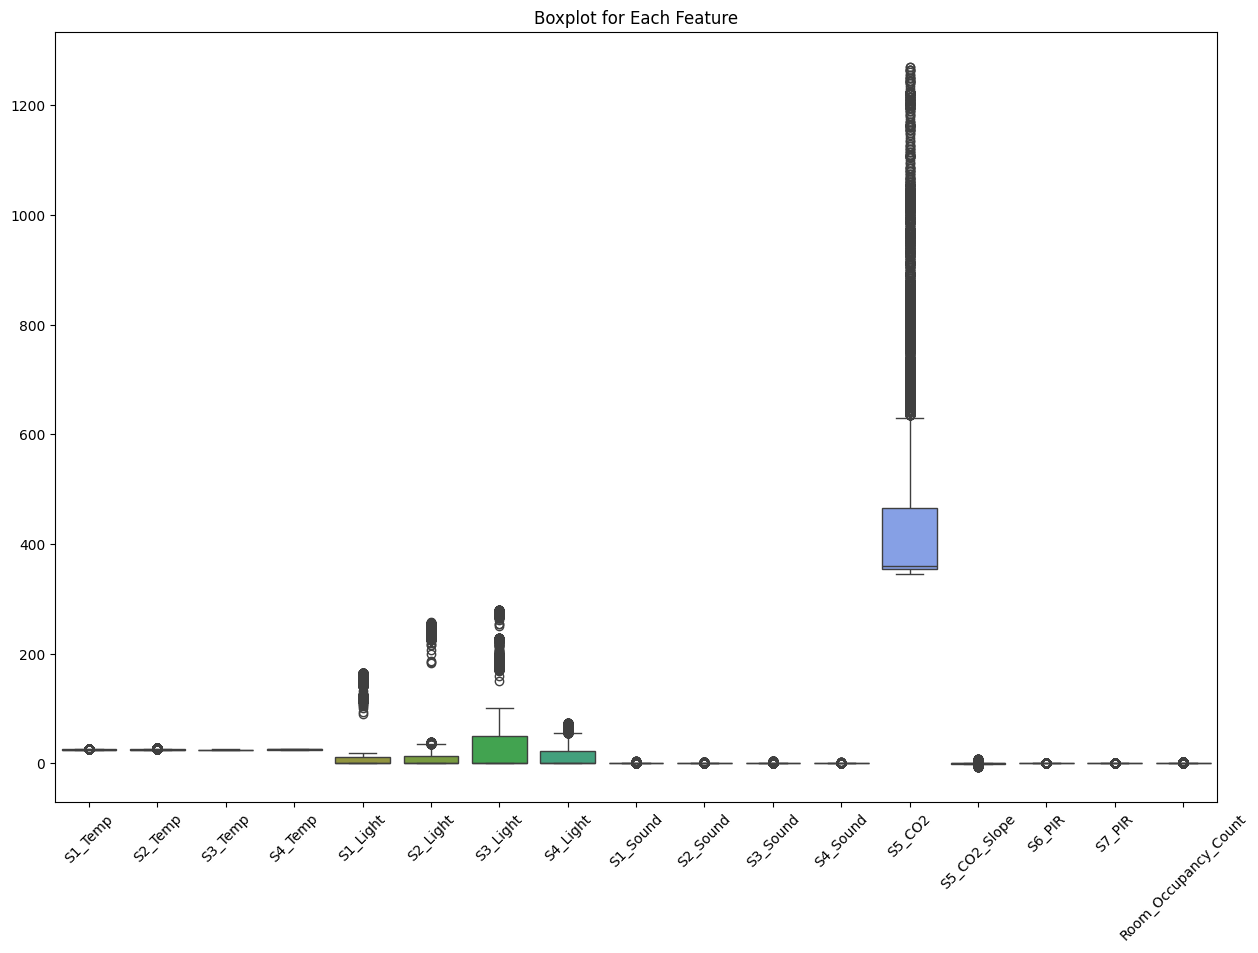

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot for Each Feature")
plt.show()

#Handeling 'Date' and 'Time'

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
data['Minute'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.minute
data['Second'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.second

In [ ]:
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data = data.set_index('Datetime')
data = data.drop(['Date', 'Time'], axis=1)
data.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Year,Month,Day,Hour,Minute,Second
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.769231,0,0,1,2017,12,22,10,49,41
2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.646154,0,0,1,2017,12,22,10,50,12
2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.519231,0,0,1,2017,12,22,10,50,42
2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.388462,0,0,1,2017,12,22,10,51,13
2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.253846,0,0,1,2017,12,22,10,51,44


#Splitting and Normalization

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Modeling (Vanilla Run)

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, predictions_rf)
print("MSE - Random Forest: ", mse_rf)

r2_rf = r2_score(y_test, predictions_rf)
print("R-squared - Random Forest: ", r2_rf)

MSE - Random Forest:  351.7328744288666
R-squared - Random Forest:  -0.1840312019778776


In [ ]:
svm = SVR()
svm.fit(X_train, y_train)
predictions_svm = svm.predict(X_test)

mse_svm = mean_squared_error(y_test, predictions_svm)
print("MSE - SVM: ", mse_svm)

r2_svm = r2_score(y_test, predictions_svm)
print("R-squared - SVM: ", r2_svm)

MSE - SVM:  297.496646622126
R-squared - SVM:  -0.001456894401324238


In [ ]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

mse_gb = mean_squared_error(y_test, predictions_gb)
print("MSE - Gradient Boosting: ", mse_gb)

r2_gb = r2_score(y_test, predictions_gb)
print("R-squared - Gradient Boosting: ", r2_gb)

MSE - Gradient Boosting:  301.27102689190383
R-squared - Gradient Boosting:  -0.01416251372906907


In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, predictions_xgb)
print("MSE - XGBoost: ", mse_xgb)

r2_xgb = r2_score(y_test, predictions_xgb)
print("R-squared - XGBoost: ", r2_xgb)

MSE - XGBoost:  346.95410068406017
R-squared - XGBoost:  -0.1679445133786639


# Principal Component Analysis (PCA)

this part is supposed to reduce complexity and noise in the data by reducing the number of features based on feature variance and focusing on the main features in the dataset

In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

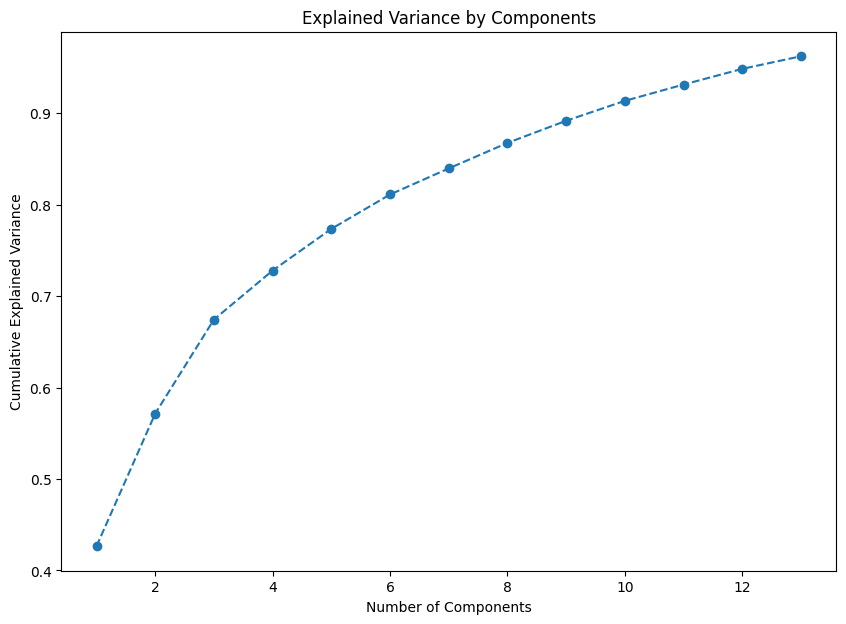

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_ ) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Text(0, 0.5, 'Second Principal Component')

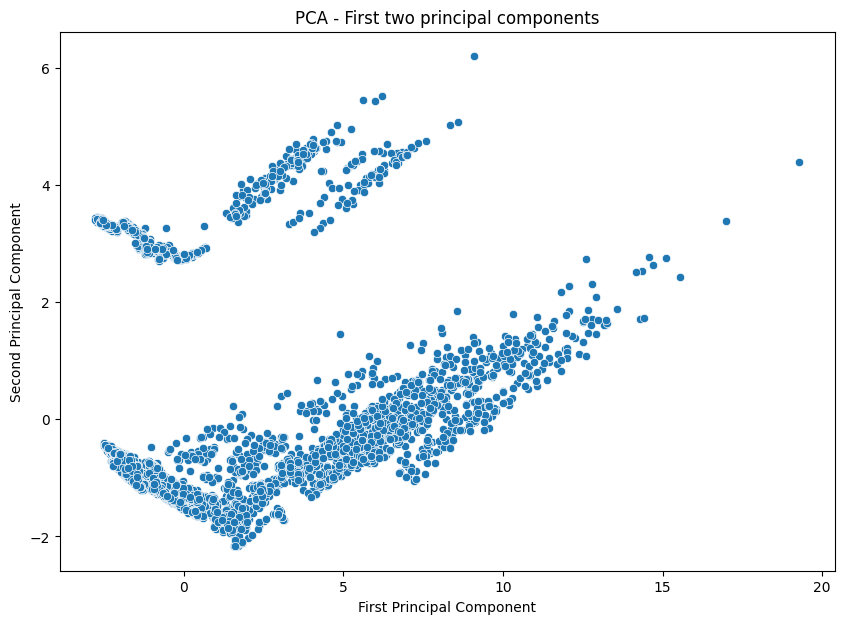

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1])
plt.title("PCA - First two principal components")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [ ]:
print("Explained variance by PCA components:", pca.explained_variance_ratio_)
print("Total variance captured by first two components:", sum(pca.explained_variance_ratio_[:2]))

Explained variance by PCA components: [0.42654196 0.1450241  0.10281028 0.0536205  0.04555229 0.03760493
 0.02851839 0.02788696 0.02421961 0.02177211 0.01784221 0.01713938
 0.01380557]
Total variance captured by first two components: 0.5715660574810872


# Modeling (post PCA)

In [ ]:
rf.fit(X_train_pca, y_train)
predictions_rf_pca = rf.predict(X_test_pca)

mse_rf_pca = mean_squared_error(y_test, predictions_rf_pca)
print("MSE - Random Forest: ", mse_rf)

r2_rf_pca = r2_score(y_test, predictions_rf_pca)
print("R-squared after PCA - Random Forest: ", r2_rf_pca)

MSE - Random Forest:  351.7328744288666
R-squared after PCA - Random Forest:  -0.10473776451573813


In [ ]:
svm.fit(X_train_pca, y_train)
predictions_svm_pca = svm.predict(X_test_pca)

mse_svm_pca = mean_squared_error(y_test, predictions_svm_pca)
print("MSE after PCA - SVM: ", mse_svm_pca)

r2_svm_pca = r2_score(y_test, predictions_svm_pca)
print("R-squared after PCA - SVM: ", r2_svm_pca)

MSE after PCA - SVM:  300.5226675461907
R-squared after PCA - SVM:  -0.011643326925575348


In [ ]:
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

mse_gb_pca = mean_squared_error(y_test, predictions_gb_pca)
print("MSE after PCA - Gradient Boosting: ", mse_gb_pca)

r2_gb = r2_score(y_test, predictions_gb)
print("R-squared after PCA - Gradient Boosting: ", r2_gb_pca)

MSE after PCA - Gradient Boosting:  297.0379469625527
R-squared after PCA - Gradient Boosting:  8.72169080130547e-05


In [ ]:
xgb.fit(X_train_pca, y_train)
predictions_xgb_pca = xgb.predict(X_test_pca)

mse_xgb_pca = mean_squared_error(y_test, predictions_xgb_pca)
print("MSE after PCA - XGBoost: ", mse_xgb_pca)

r2_xgb_pca = r2_score(y_test, predictions_xgb_pca)
print("R-squared after PCA - XGBoost: ", r2_xgb_pca)

MSE after PCA - XGBoost:  345.07954865884705
R-squared after PCA - XGBoost:  -0.16163424712565266


# Modeling (post PCA + Hyperparameter changes)

In [ ]:
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_rf.fit(X_train_pca, y_train)

best_rf = grid_rf.best_estimator_

best_rf.fit(X_train_pca, y_train)
predictions_rf_pca = best_rf.predict(X_test_pca)

mse_rf_pca = mean_squared_error(y_test, predictions_rf_pca)
print("MSE after PCA - Random Forest: ", mse_rf_pca)

r2_rf_pca = r2_score(y_test, predictions_rf_pca)
print("R-squared after PCA - Random Forest: ", r2_rf_pca)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
MSE after PCA - Random Forest:  300.1343403643901
R-squared after PCA - Random Forest:  -0.010336109052993425


In [ ]:
param_grid_svm = {'C': [1, 10], 'gamma': [0.001, 0.01]}
grid_svm = GridSearchCV(SVR(), param_grid_svm, cv=3, n_jobs=-1, verbose=2)
grid_svm.fit(X_train_pca, y_train)

best_svm = grid_svm.best_estimator_

best_svm.fit(X_train_pca, y_train)
predictions_svm_pca = best_svm.predict(X_test_pca)

mse_svm_pca = mean_squared_error(y_test, predictions_svm_pca)
print("MSE after PCA - SVM: ", mse_svm_pca)

r2_svm_pca = r2_score(y_test, predictions_svm_pca)
print("R-squared after PCA - SVM: ", r2_svm_pca)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
MSE after PCA - SVM:  297.6688552853663
R-squared after PCA - SVM:  -0.0020365969123803396


In [ ]:
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_gb.fit(X_train_pca, y_train)

best_gb = grid_gb.best_estimator_

best_gb.fit(X_train_pca, y_train)
predictions_gb_pca = best_gb.predict(X_test_pca)

mse_gb_pca = mean_squared_error(y_test, predictions_gb_pca)
print("MSE after PCA - Gradient Boosting: ", mse_gb_pca)

r2_gb_pca = r2_score(y_test, predictions_gb_pca)
print("R-squared after PCA - Gradient Boosting: ", r2_gb_pca)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
MSE after PCA - Gradient Boosting:  297.0379469625527
R-squared after PCA - Gradient Boosting:  8.72169080130547e-05


In [ ]:
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_xgb.fit(X_train_pca, y_train)

best_xgb = grid_xgb.best_estimator_

best_xgb.fit(X_train_pca, y_train)
predictions_xgb_pca = best_xgb.predict(X_test_pca)

mse_xgb_pca = mean_squared_error(y_test, predictions_xgb_pca)
print("MSE after PCA - XGBoost: ", mse_xgb_pca)

r2_xgb_pca = r2_score(y_test, predictions_xgb_pca)
print("R-squared after PCA - XGBoost: ", r2_xgb_pca)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
MSE after PCA - XGBoost:  297.1654943914398
R-squared after PCA - XGBoost:  -0.00034214340065719107
